In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
# import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import datetime as dt

%matplotlib inline

In [2]:
# Import the Microsoft data
filepath = Path("../data/MSFT_EWMA_MACD_signals.csv")

In [3]:
# Read in the previously saved EWMA and MACD csv
msft_ewma_macd_df = pd.read_csv(filepath)
msft_ewma_macd_df["timestamp"] = pd.to_datetime(msft_ewma_macd_df["timestamp"]).dt.date
msft_ewma_macd_df = msft_ewma_macd_df.set_index("timestamp")
msft_ewma_macd_df.head()

,Short_EWMA,Long_EWMA,Final_Signal,macd,signal_lag,divergence
timestamp,,,,,,
2017-06-01,70.100000,70.100000,0.0,0.000000,0.000000,0.000000
2017-06-02,70.999167,70.961923,0.0,0.037244,0.020691,0.016553
2017-06-05,71.499076,71.435495,0.0,0.063581,0.038269,0.025312
2017-06-06,71.821342,71.738675,0.0,0.082667,0.053309,0.029358
2017-06-07,71.975844,71.889720,0.0,0.086124,0.063070,0.023054


In [4]:
# Confirm the shape of the data
msft_ewma_macd_df.shape

(1260, 6)

In [5]:
# Create your features dataset
X = msft_ewma_macd_df[["Short_EWMA", "Long_EWMA", "macd", "signal_lag"]]
X = X.drop(X.index[1259])
# display(X.head())
# display(X.tail())
X

,Short_EWMA,Long_EWMA,macd,signal_lag
timestamp,,,,
2017-06-01,70.100000,70.100000,0.000000,0.000000
2017-06-02,70.999167,70.961923,0.037244,0.020691
2017-06-05,71.499076,71.435495,0.063581,0.038269
2017-06-06,71.821342,71.738675,0.082667,0.053309
2017-06-07,71.975844,71.889720,0.086124,0.063070
...,...,...,...,...
2022-05-24,261.857360,269.924942,-8.067582,-7.886178
2022-05-25,261.959304,269.376428,-7.417124,-7.792367
2022-05-26,262.565565,269.118915,-6.553349,-7.544564


In [6]:
# Save your target to y
y = msft_ewma_macd_df["Final_Signal"]
y = y.shift(1).dropna()
y

timestamp
2017-06-02    0.0
2017-06-05    0.0
2017-06-06    0.0
2017-06-07    0.0
2017-06-08    0.0
             ... 
2022-05-25    0.0
2022-05-26    0.0
2022-05-27    0.0
2022-05-31    0.0
2022-06-01    0.0
Name: Final_Signal, Length: 1259, dtype: float64

In [8]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [9]:
# training_end = X.index.min() + DateOffset(months= 42) 
# print(training_end)

In [10]:
# X_train = X.loc[training_begin:training_end]
# y_train = y.loc[training_begin:training_end]

In [11]:
# X_test = X.loc[training_end:]
# y_test = y.loc[training_end:]



In [12]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler model to the X training data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test Data using the Scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
# Create the model instance for the Artificial Neural Network
ann = tf.keras.models.Sequential()
number_units= 100

# Layer 1
ann.add(tf.keras.layers.Dense(units=number_units, activation="sigmoid"))
# Layer 2
ann.add(tf.keras.layers.Dense(units=50, activation="sigmoid"))
# Layer 3
ann.add(tf.keras.layers.Dense(units=20, activation="tanh"))
# Output layer
ann.add(tf.keras.layers.Dense(units=1, activation = "sigmoid"))   

In [14]:
# Compile the model using "adam" and "binary_crossentropy"
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [16]:
# Fit the model to the scaled training data, 500 Epochs
ann.fit(X_train_scaled, y_train, epochs=500, batch_size=32)

Epoch 1/500
32/32 [==============================] - 1s 2ms/step - loss: 0.7040 - accuracy: 0.5263
Epoch 2/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6761 - accuracy: 0.5521
Epoch 3/500
32/32 [==============================] - 0s 4ms/step - loss: 0.6586 - accuracy: 0.5760
Epoch 4/500
32/32 [==============================] - 0s 4ms/step - loss: 0.6375 - accuracy: 0.6028
Epoch 5/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6255 - accuracy: 0.6306
Epoch 6/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6160 - accuracy: 0.6187
Epoch 7/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5987 - accuracy: 0.6604
Epoch 8/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5888 - accuracy: 0.6683
Epoch 9/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5870 - accuracy: 0.6475
Epoch 10/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5715 - accuracy: 0.6713
Epoch 11/

In [17]:
# Evaluate the loss of the model on testing data
model_loss, model_accuracy = ann.evaluate(X_test_scaled, y_test, verbose=2)

8/8 - 0s - loss: 0.0618 - accuracy: 0.9802 - 166ms/epoch - 21ms/step


In [18]:
# Create a prediction using the testing data
prediction = (ann.predict(X_test_scaled)> 0.5).astype("int32")

In [19]:
# Show the results in a Dataframe
results = pd.DataFrame({"predictions": prediction.ravel(), "actual": y_test})
results.head(10)

,predictions,actual
timestamp,,
2021-04-14,1,1.0
2020-04-13,1,1.0
2021-04-23,1,1.0
2019-08-09,0,0.0
2019-06-17,1,1.0
2017-11-20,0,0.0
2022-03-17,0,0.0
2017-11-02,1,1.0
2020-01-07,0,1.0


In [21]:
# Run a classification report on the target testing and prediction data
report = classification_report(y_test, prediction)
# Display the report
print(report)

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       143
         1.0       1.00      0.95      0.98       109

    accuracy                           0.98       252
   macro avg       0.98      0.98      0.98       252
weighted avg       0.98      0.98      0.98       252



In [ ]:
# Import TSLA data to make prediction on new data
# Separate the data into features and target sets
tsla_df = pd.read_csv("../data/TSLA_EWMA_MACD_signals.csv")
tsla_df["timestamp"] = pd.to_datetime(tsla_df["timestamp"]).dt.date
tsla_df = tsla_df.set_index("timestamp")
tsla_df.head()
tsla_df = tsla_df.iloc[1000:]
tsla_df_X = tsla_df[["Short_EWMA", "Long_EWMA", "macd", "signal_lag"]]
tsla_y = tsla_df[["Final_Signal"]]



<AxesSubplot:ylabel='Frequency'>

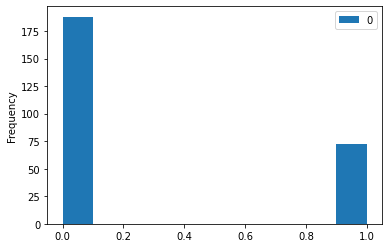

In [156]:
# Use the ANN to make a prediction on the TSLA data and visualize the result
tsla_prediction = (ann.predict(tsla_df_X)> 0.5).astype("int32")
tsla_plot = pd.DataFrame(tsla_prediction)
tsla_plot.plot.hist()


In [157]:
# Run a classification report on the TSLA target testing and prediction data
report = classification_report(tsla_y, tsla_prediction)

# Display the report
print(report)

              precision    recall  f1-score   support

         0.0       0.82      0.91      0.87       170
         1.0       0.79      0.63      0.70        90

    accuracy                           0.82       260
   macro avg       0.81      0.77      0.78       260
weighted avg       0.81      0.82      0.81       260



In [30]:
# Save model as JSON
ann_json = ann.to_json()
file_path = Path("../data/model.json")
with open(file_path, "w") as json_file:
    json_file.write(ann_json)

# # # Save weights
file_path = "../data/model.h5"
ann.save_weights(file_path)

In [158]:
# Load the model to verify model has been saved correctly
from tensorflow.keras.models import model_from_json

# Load json and create model
file_path = Path("../data/model.json")
with open(file_path, "r") as json_file:
    model_json = json_file.read()
loaded_model = model_from_json(model_json)

# Load weights into new model
file_path = "../data/model.h5"
loaded_model.load_weights(file_path)

In [159]:
# Test the imported model on the TSLA data
predd = (loaded_model.predict(tsla_df_X)> 0.5).astype("int32")
predd = pd.DataFrame(predd)
predd = predd.set_index(tsla_df.index)
predd.tail()


,0
timestamp,
2022-05-25,0
2022-05-26,0
2022-05-27,0
2022-05-31,0
2022-06-01,0


In [162]:
# Run a classification report and compare with earlier report to confirm
reportly = classification_report(tsla_y, predd)
# Display the report
print(reportly)


              precision    recall  f1-score   support

         0.0       0.82      0.91      0.87       170
         1.0       0.79      0.63      0.70        90

    accuracy                           0.82       260
   macro avg       0.81      0.77      0.78       260
weighted avg       0.81      0.82      0.81       260



In [29]:
# Precision: 82% 0's labelled as a 0 was in fact a 0. 79% of 1's labelled as 1's was in fact a 1.
# We want a high precision for 0's? over 1's- If entry position is high?
# Recall: Only 91% of 0's were labelled correctly as a 0. 63% of 1's were correctly labelled as 1's. 
# So when there was a one, 79% of the time, when 1 actually happened, it was predicted by our model. But only 63% the 1's 
# that were predicted, were actual 1's. For 0's 82% 0's that happened were predicted, and 91% of them were actually 0's
# So our model seems good at predicting downtrends, but not uptrends. (low risk model?)
# In this instance, which on is more important: (cost of False Positives)Precision or the (cost of False negatives)Recall? or F1?